<a href="https://colab.research.google.com/github/nitha604/SCT_ML_2/blob/main/Customer_Group_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers (1).csv to Mall_Customers (1).csv


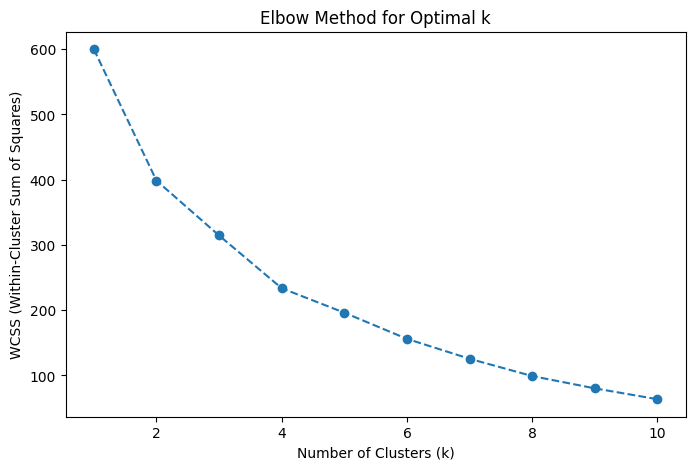


Optimal number of clusters based on Silhouette Score: 10 (score: 0.5508)

First 10 predicted cluster labels:
   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        8
1                  15                      81        9
2                  16                       6        0
3                  16                      77        7
4                  17                      40        0
5                  17                      76        7
6                  18                       6        0
7                  18                      94        7
8                  19                       3        8
9                  19                      72        7

Centroid values for each cluster:
Cluster 0: [-1.2673341  -1.10585989 -0.88640526]
Cluster 1: [-0.2296472  -0.02633115 -0.88640526]
Cluster 2: [1.01344075 1.26040667 1.12815215]
Cluster 3: [-0.2223257  -0.01347337  1.12815215]
Cluster 4: [ 0.97284787  1.22158511 -0.88640526]
Cluster 

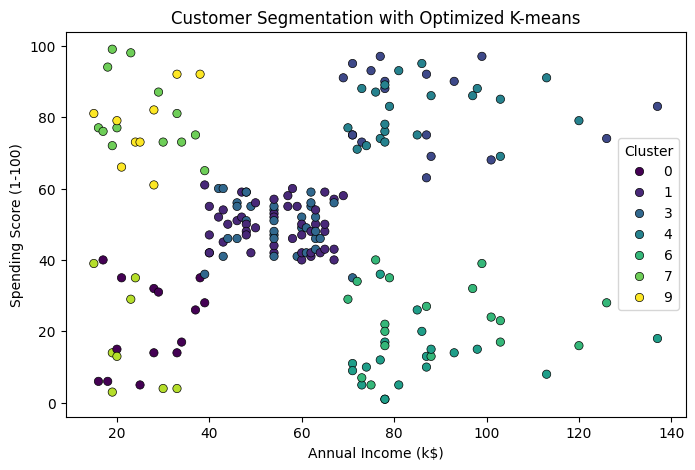

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from google.colab import files

# Upload the file manually in Colab
uploaded = files.upload()

# Load dataset
df = pd.read_csv(list(uploaded.keys())[0])

# Handling categorical features (e.g., Gender)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])  # Convert 'Female'/'Male' to numeric

# Selecting relevant features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
if 'Gender' in df.columns:
    features.append('Gender')  # Optionally include gender in clustering

data = df[features]

# Normalize data for better clustering accuracy
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Determine optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):  # Trying different k values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=20)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# 📊 **Plot Elbow Method Graph**
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

# 🏆 **Choose Optimal k Automatically Using Silhouette Score**
best_k = 2
best_score = -1
for k in range(2, 11):  # Trying different k values from 2 to 10
    kmeans_test = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=20)
    labels = kmeans_test.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    if score > best_score:
        best_k = k
        best_score = score

print(f"\nOptimal number of clusters based on Silhouette Score: {best_k} (score: {best_score:.4f})")

# ✅ **Apply K-means with optimal k**
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=20)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Print first 10 predicted cluster labels
print("\nFirst 10 predicted cluster labels:")
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10))

# Display cluster centroids
centroids = kmeans.cluster_centers_
print("\nCentroid values for each cluster:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

# Cluster-wise summary statistics
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster-wise Average Values:")
print(cluster_summary)

# 📊 **Graph: Cluster Visualization**
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', edgecolor='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation with Optimized K-means")
plt.legend(title="Cluster")
plt.show()